<a href="https://colab.research.google.com/github/iwatsuki-yuuki/college/blob/main/%E6%83%85%E5%A0%B1%E3%82%B7%E3%82%B9%E3%83%86%E3%83%A0%E5%B7%A5%E5%AD%A6%E6%BC%94%E7%BF%92%EF%BC%88%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E5%85%A5%E9%96%80%E8%AA%B2%E9%A1%8C%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 情報システム工学演習I（データ分析入門課題）


- データは永野芽郁のgoogleトレンドを使用



### データの可視化と分析

#### (1-1) データのインポート

In [48]:
import pandas as pd # pandas のimport
df = pd.read_csv('multiTimeline (1).csv',header=1) # ファイル名を指定
df['時間'] = pd.to_datetime(df['時間'])
df.set_index('時間',inplace=True)
print(df.columns)
df.head() # 可視化 (table)


Index(['永野芽郁: (日本)'], dtype='object')


,永野芽郁: (日本)
時間,
2025-05-17 14:00:00,24
2025-05-17 15:00:00,24
2025-05-17 16:00:00,23
2025-05-17 17:00:00,23
2025-05-17 18:00:00,25


#### (1-2) データの可視化

<Axes: xlabel='時間'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 27704 (\N{CJK UNIFIED IDEOGRAPH-6C38}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 37326 (\N{CJK UNIFIED IDEOGRAPH-91CE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 33469 (\N{CJK UNIFIED IDEOGRAPH-82BD}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph

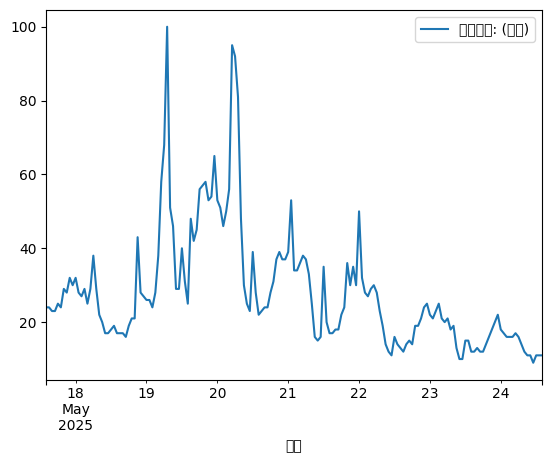

In [49]:
df.plot()

### 時系列モデルを使った将来予測

In [38]:
# https://www.statsmodels.org/stable/tsa.html
!pip install statsmodels


In [43]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

Y_org: (169, 1)


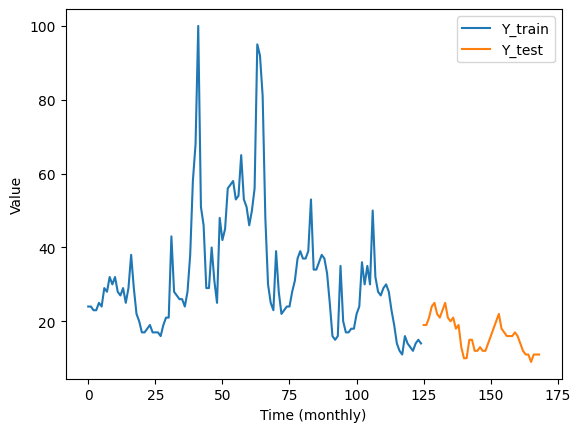

In [57]:
# 学習データ、予測データの作成
Y_org = df.to_numpy(); print(f'Y_org: {Y_org.shape}')
n_a = 0; n_b = 125; n_c = n_b + 44  # time points a,b,c
# 学習データ、テストデータを作る
Y_train = Y_org[n_a:n_b] # train data
Y_test  = Y_org[n_b:n_c] # test data
#print(Y_train.shape)
#print(Y_test.shape)
# オリジナルデータの可視化
plt.figure()
plt.plot(np.arange(n_a,n_b), Y_train, label='Y_train')
plt.plot(np.arange(n_b,n_c), Y_test,  label='Y_test')
plt.xlabel('Time (monthly)'); plt.ylabel('Value')
plt.legend()

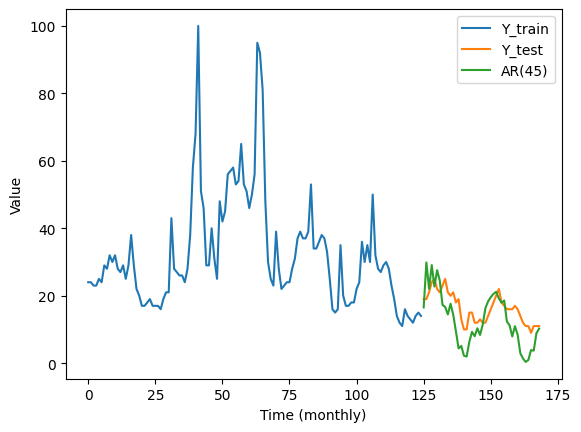

In [71]:
# AutoRegressive model を用いた時系列モデル学習と将来予測
lag_ar  =  45
ar      = AutoReg(Y_train, lags = 45)
res     = ar.fit()
Y_pred = ar.predict(res.params, start=n_b, end=n_c-1)
# オリジナルデータと予測結果の可視化
plt.figure()
plt.plot(np.arange(n_a,n_b), Y_train, label='Y_train')
plt.plot(np.arange(n_b,n_c), Y_test,  label='Y_test')
plt.plot(np.arange(n_b,n_c), Y_pred,  label=f'AR({lag_ar})')
plt.xlabel('Time (monthly)'); plt.ylabel('Value')
plt.legend()

#### (2-2) 予測精度の計算 (RMSE, MAE)

In [79]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
# 予測誤差を計算する関数
def my_accuracy(y_true, y_pred):
  accuracy = {
            "RMSE":   root_mean_squared_error(y_true,  y_pred),
            "MAE":    mean_absolute_error(y_true, y_pred)
            }
  return accuracy
# 予測誤差を表示
print(f'Forecasting error: {my_accuracy(Y_test, Y_pred)}')

Forecasting error: {'RMSE': 6.420873152050007, 'MAE': 5.469776259044689}


In [81]:
mean_actual = np.mean(Y_test.flatten())
mae_accuracy = 1 - (mean_absolute_error(Y_test, Y_pred) / mean_actual)
rmse_accuracy = 1 - (root_mean_squared_error(Y_test,  Y_pred) / mean_actual)
StopAsyncIteration
print(f"MAE Accuracy : {mae_accuracy*100:.2f}%")
print(f"RMSE Accuracy: {rmse_accuracy*100:.2f}%")

MAE Accuracy : 66.48%
RMSE Accuracy: 60.65%
